### Applying principal component analysis on cancer data and images

In [1]:
import mglearn 

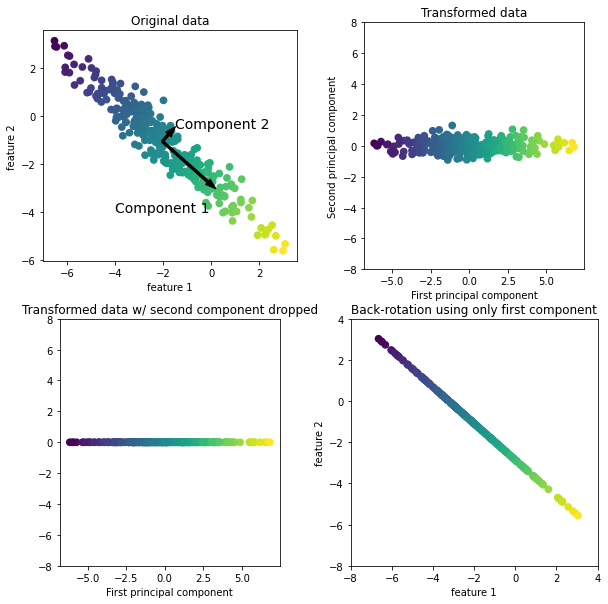

In [2]:
mglearn.plots.plot_pca_illustration()

First plot - The original data as it should be having two components. The arrows are showing the variance in each component. 
Second plot - Rotated view of the original data 
Third plot - Applying PCA to completely remove the $2^{nd}$ component 
Fourth plot - Rotating the reduced curve back to its original dimensions. 

In [3]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
cancer = load_breast_cancer()
cancer['feature_names'].shape

(30,)

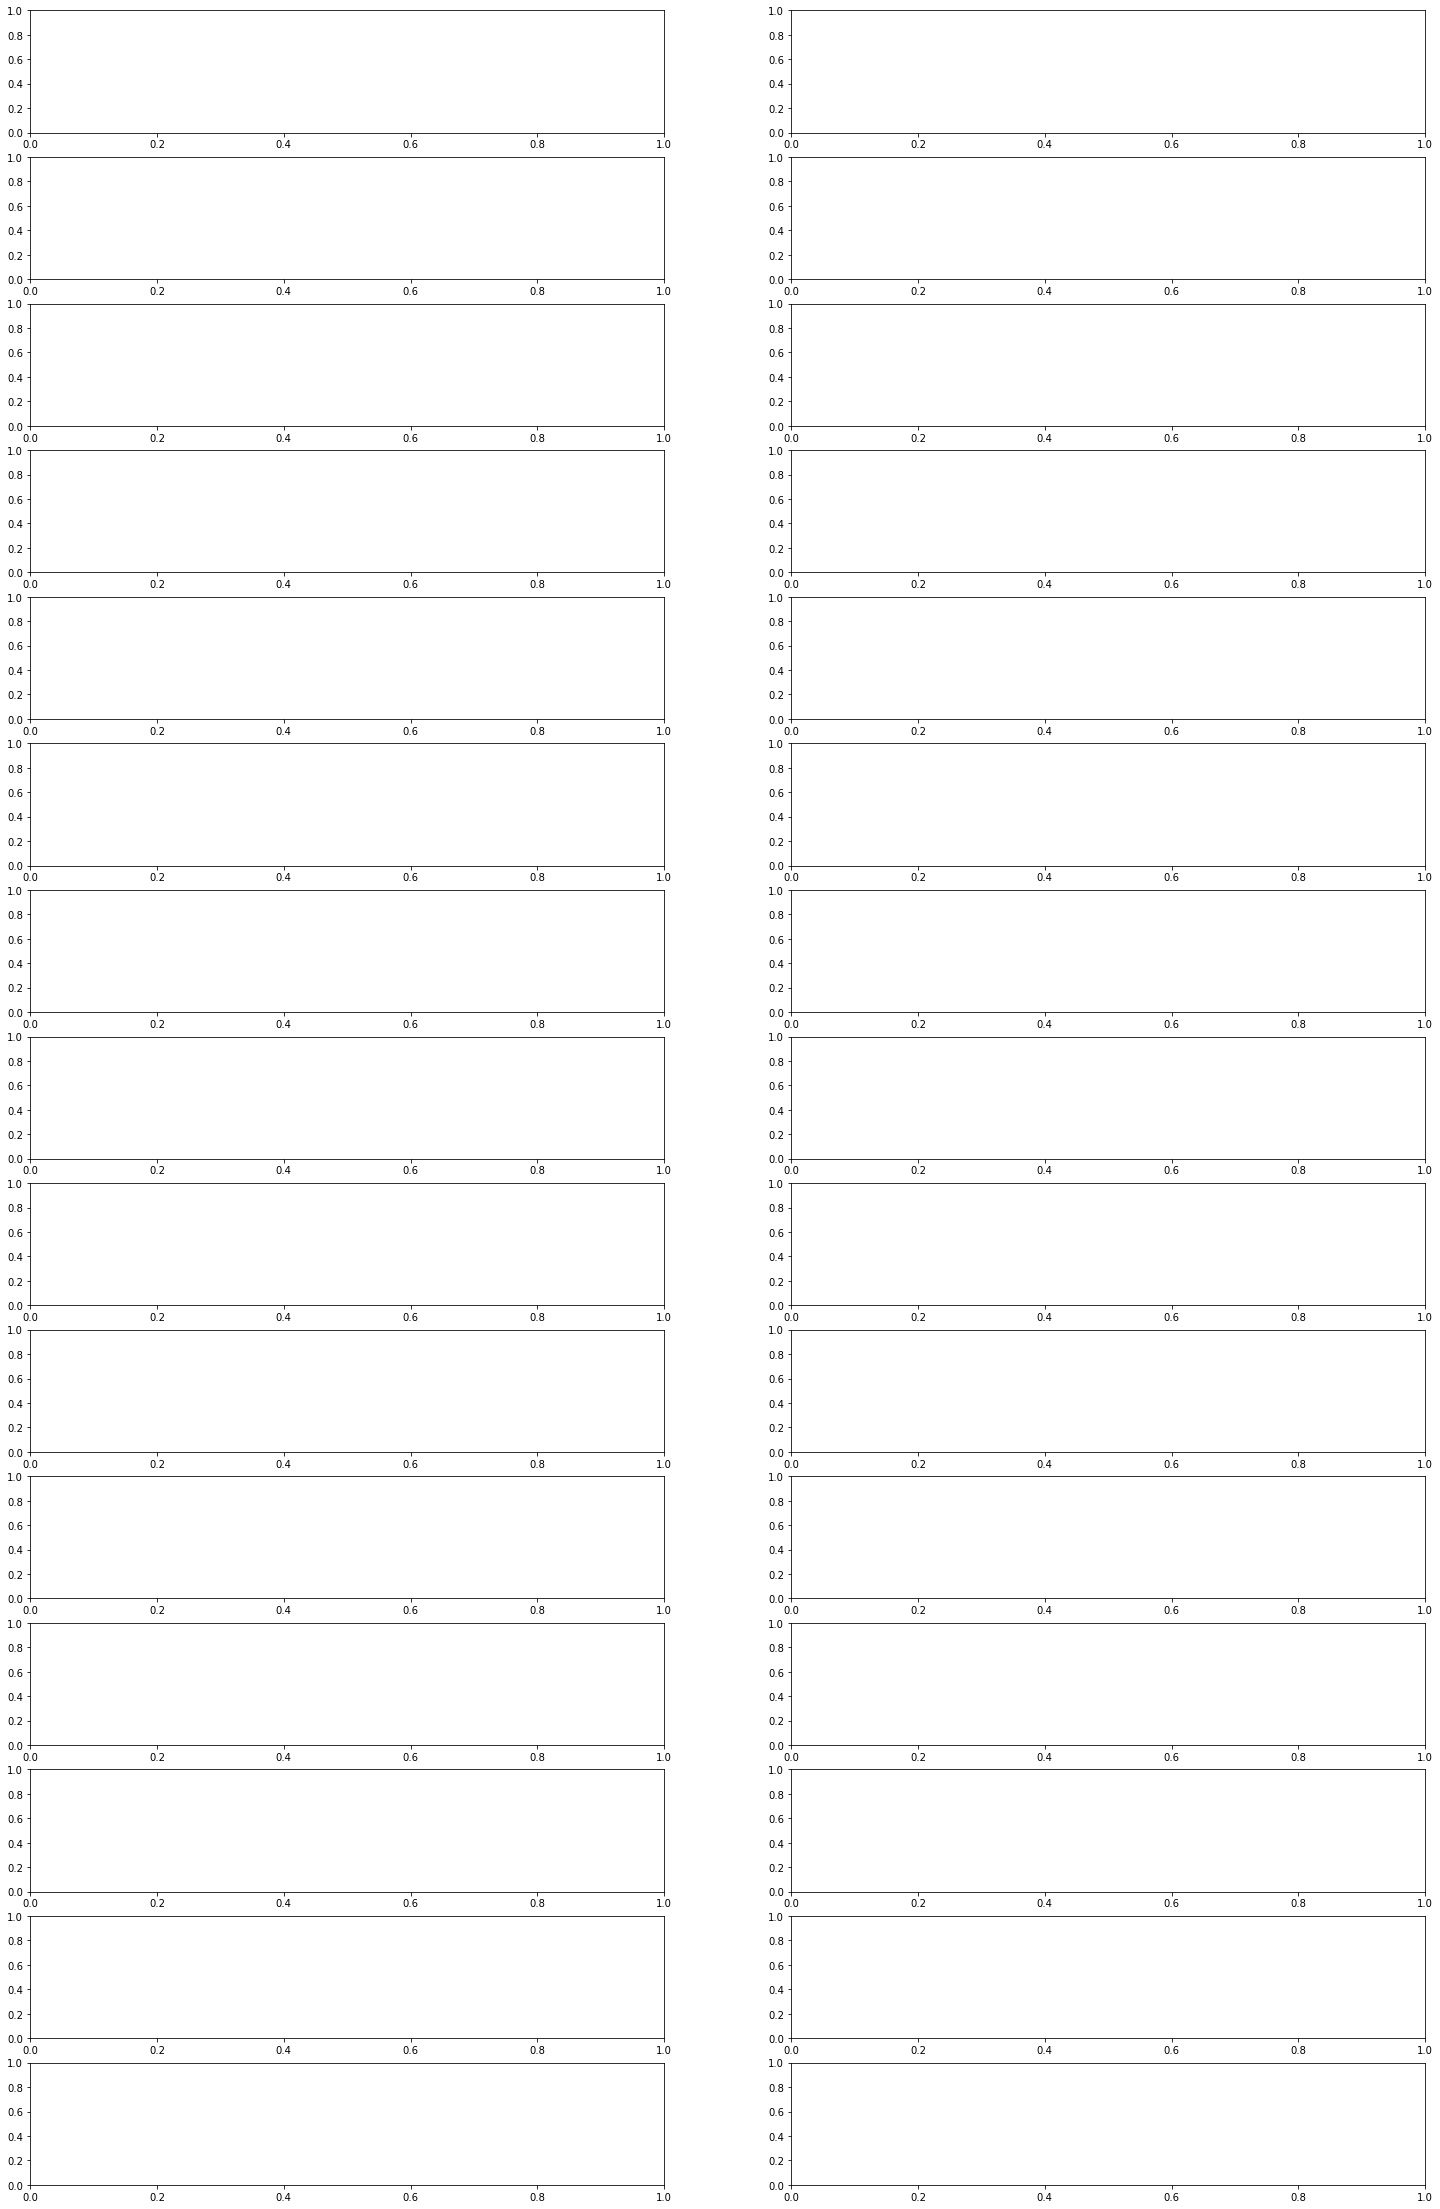

In [5]:
fig, axes = plt.subplots(15, 2, figsize=(25, 40))

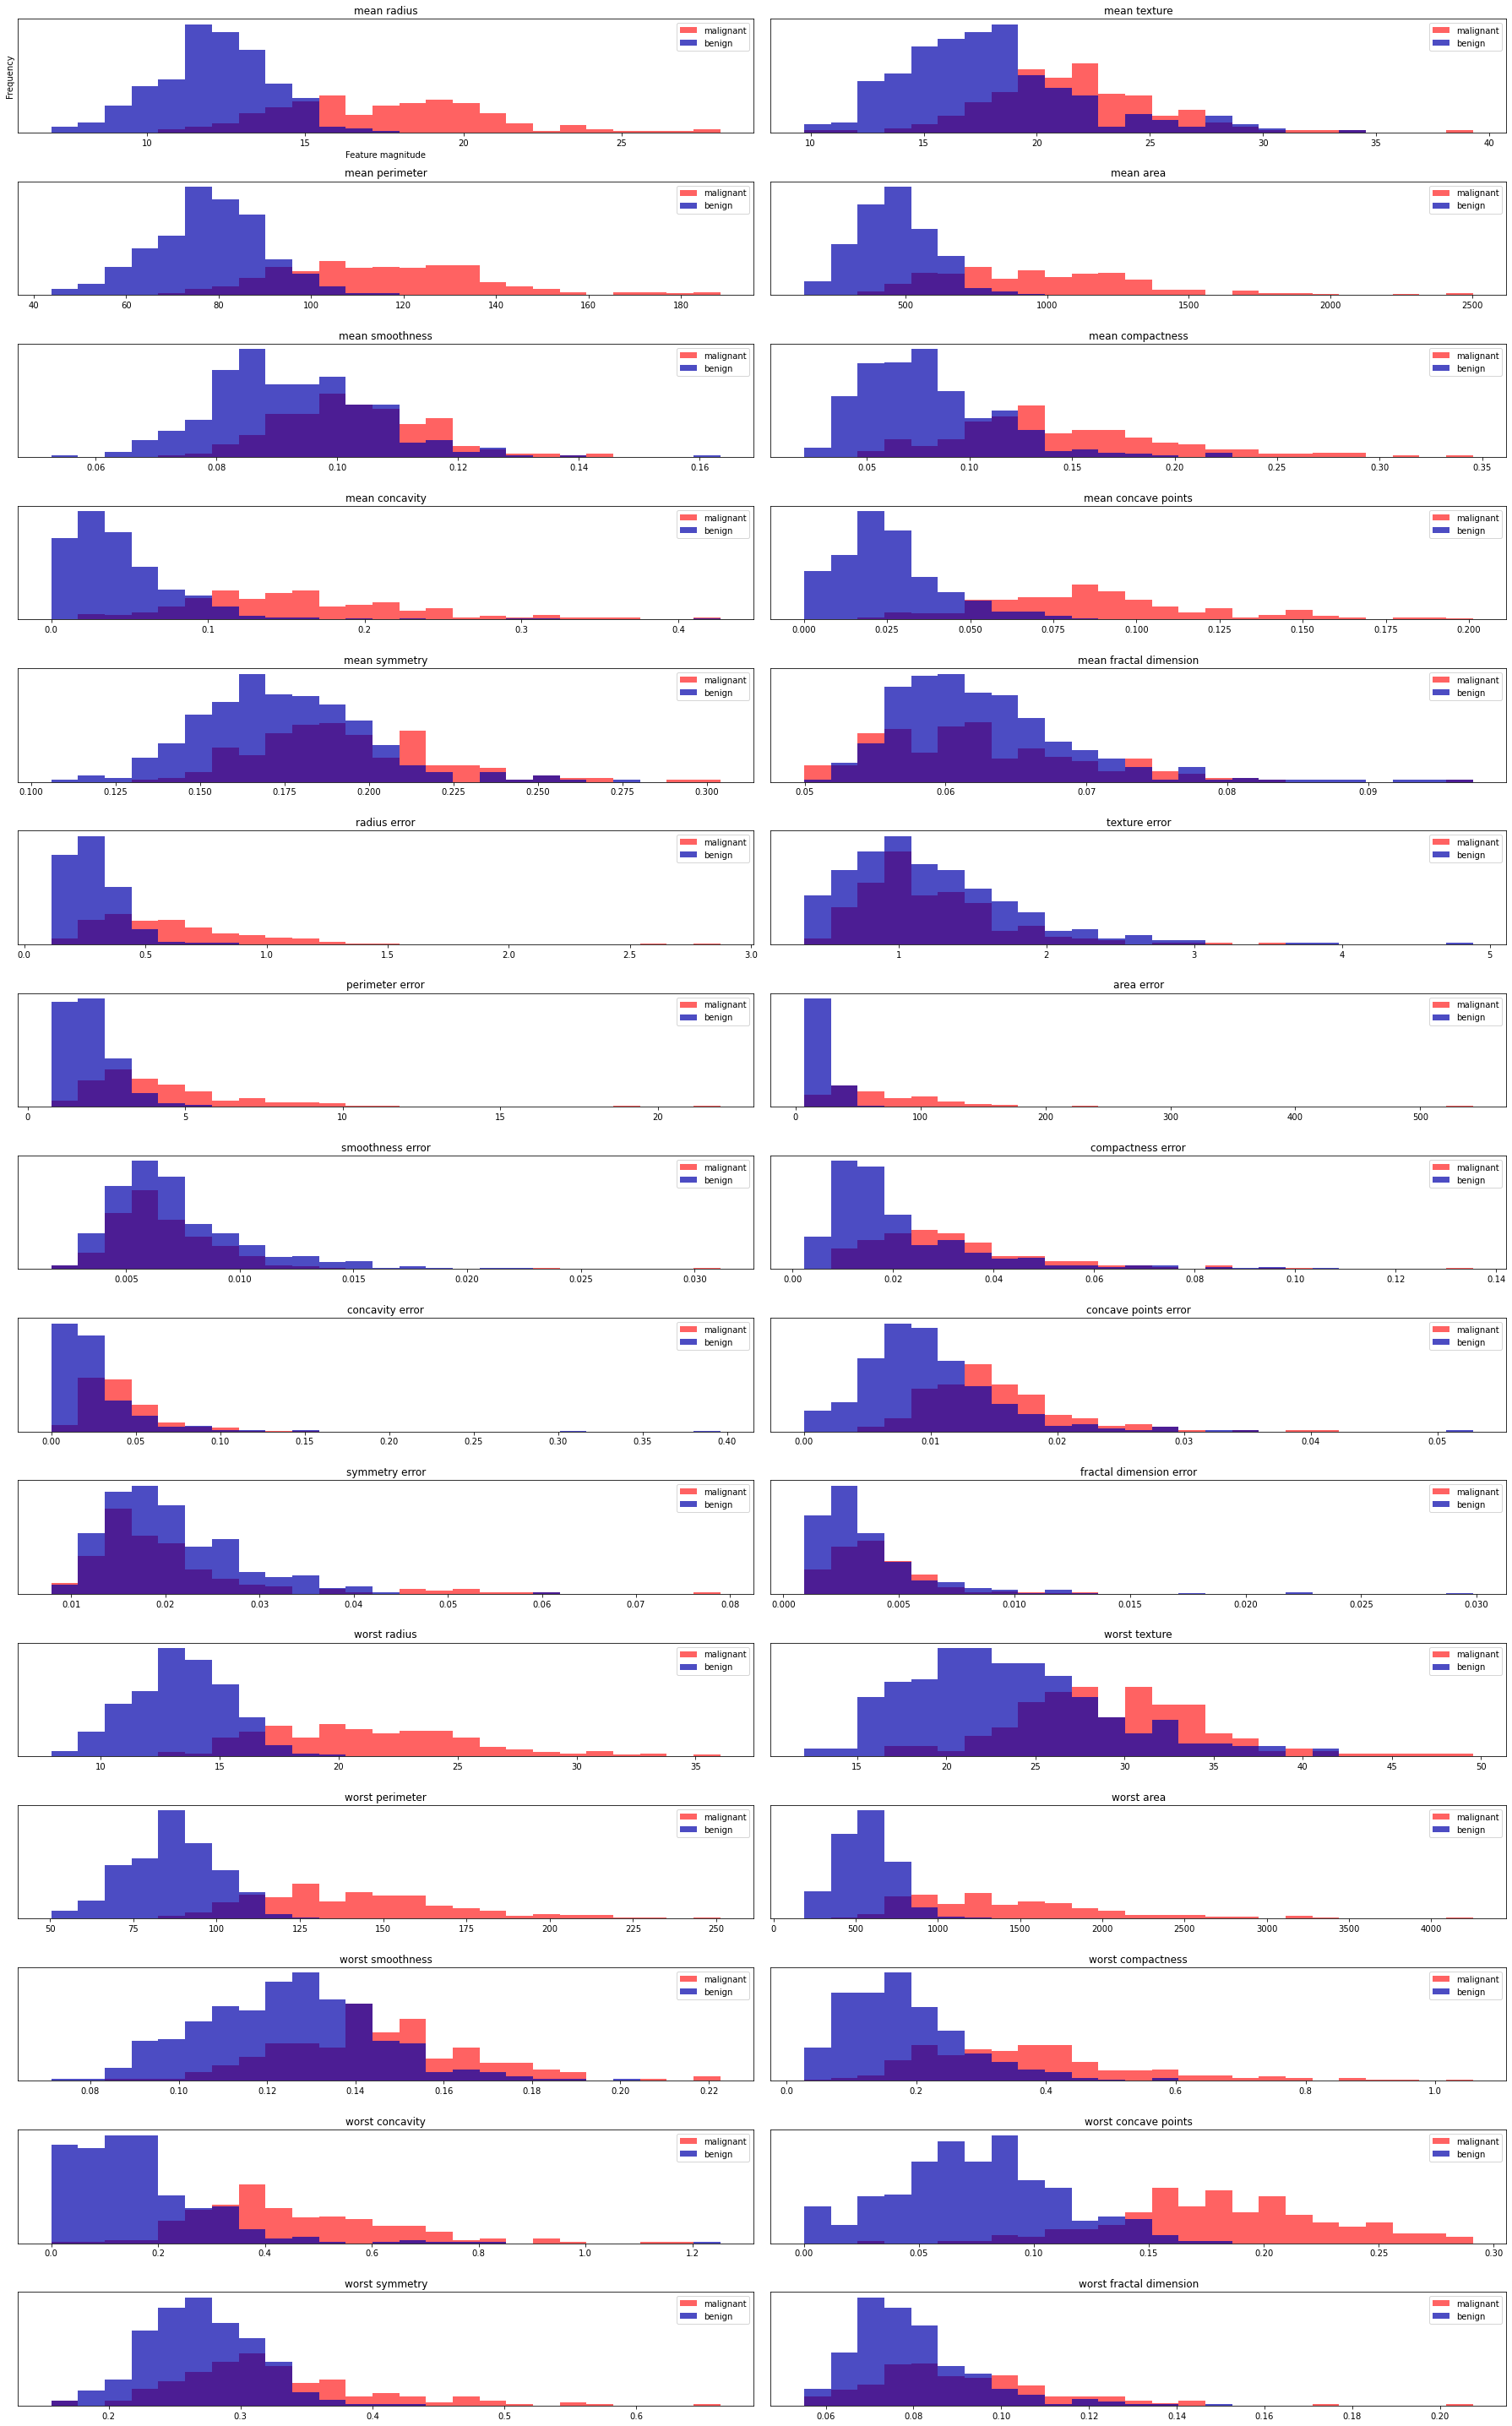

In [6]:
fig, axes = plt.subplots(15, 2, figsize=(25, 40)) #Plotting 30 different curves for the 30 features 
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel() #Ravel is used to flatten a multi-dimensional array into a single dimension array

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=25)  #Number of of histograms for each curver are set to 25 
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(1), alpha=0.7)  #Plotting malignant cancers in red 
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.7) #Plotting benign cancers in blue 
    ax[i].set_title(cancer.feature_names[i])    
    ax[i].set_yticks(())
    ax[i].legend(["malignant", "benign"], loc="best")
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()  

The advantage of using histograms here is to distinguish between features and find which features are better at distinguishing the cancers. For eg, worst smoothness and worst concave points look mostly disjoint whereas symmetry error and smoothness error are not so good as they are overlapping very badly. 

In [7]:
scaler = StandardScaler()
scaler.fit(cancer.data)
x_scaled = scaler.transform(cancer.data)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
print("Shape of original data {}".format(x_scaled.shape))

Shape of original data (569, 30)


In [10]:
print("Shape of reduced data {}".format(x_pca.shape))

Shape of reduced data (569, 2)


Text(0, 0.5, 'Second Principal Component')

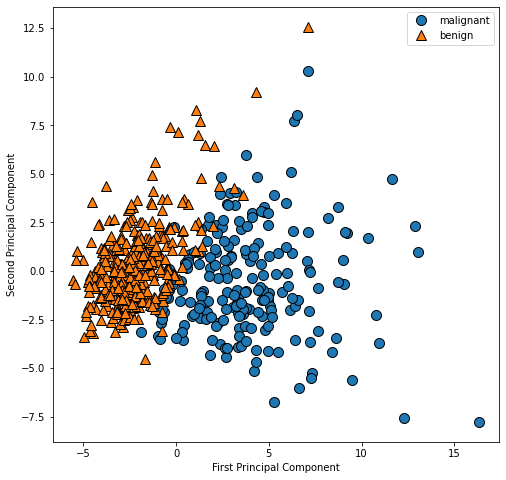

In [11]:
from numpy import equal


plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], cancer.target)   

plt.legend(cancer.target_names, loc="best")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

Text(0, 0.5, 'Principal components')

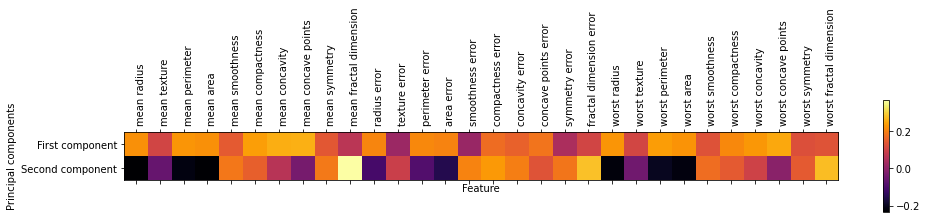

In [12]:
plt.matshow(pca.components_, cmap='inferno')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")


Highlighting the above heatmap is a downsight of using PCA since we can see that all the values for the First Component have +ve values since +ve and -ve values do not make sense as they were a part of vectors and thus a correlation between values comes up in First Component which is not good for dimensionality reduction where they should be independent. 

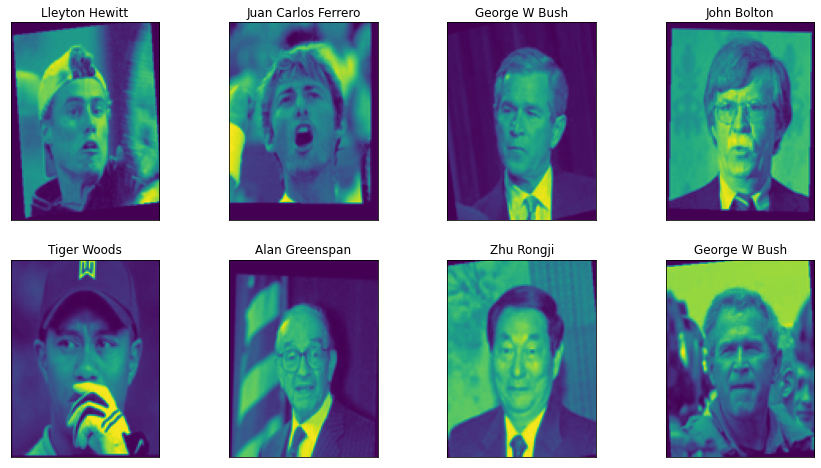

In [13]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=3, resize=1)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 4, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [14]:
print(people.images.shape)
print(len(people.target_names))

(4592, 125, 94)
369


In [15]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:30} {1:4}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Abdullah                          4 Abdullah al-Attiyah               3 Aicha El Ouafi                    3 
Akbar Hashemi Rafsanjani          3 Al Gore                           8 Alan Greenspan                    5 
Albert Costa                      6 Alec Baldwin                      4 Alejandro Avila                   3 
Alejandro Toledo                 39 Alex Sink                         3 Ali Naimi                         8 
Alvaro Uribe                     35 Amelie Mauresmo                  21 Amer al-Saadi                     4 
Ana Guevara                       7 Ana Palacio                       8 Anders Ebbeson                    3 
Anders Fogh Rasmussen             4 Andre Agassi                     36 Andy Roddick                     15 
Angela Merkel                     5 Ann Veneman                      11 Anna Kournikova                  12 
Ari Fleischer                    13 Ariel Sharon                     77 Arminio Fraga                     6 
Arnoldo Aleman     

In [16]:
mask = np.zeros(people.target.shape, dtype=np.bool) # Making an array of zeros of size people.target and type boolean
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1 # Taking 50 images of each person 

x_people = people.data[mask]    
y_people = people.target[mask]

x_people = x_people / 255       # Dividing by 255 so that each value lies between 0 and 1 
print(x_people)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00017942 0.00020505 0.00018967 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00020505 0.00023581 0.00026656 ... 0.00066128 0.00066128 0.00069204]
 [0.00196335 0.0030091  0.00293221 ... 0.00026144 0.00034858 0.00050237]
 [0.         0.         0.         ... 0.0032039  0.00143535 0.00139946]]


C:\Users\eshub\AppData\Local\Temp\ipykernel_860\3848647941.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool) # Making an array of zeros of size people.target and type boolean


For face recognition, instead of using classfication technique and giving a class to each person, we can use a KNN method in which any new face which is added onto the database can simply be mapped to a person based on closeness to the original person. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(x_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
print("Testing score for KNN is {:.2f}".format(knn.score(x_test, y_test)))

Testing score for KNN is 0.08


As we can see that KNN is not very good in terms of identifying images simply. Measuring distances between corresponding pixels is a bad way of identification. Now, we will use a special method of PCA called $whitening$ which is basically used to remove any coorelation between the data.

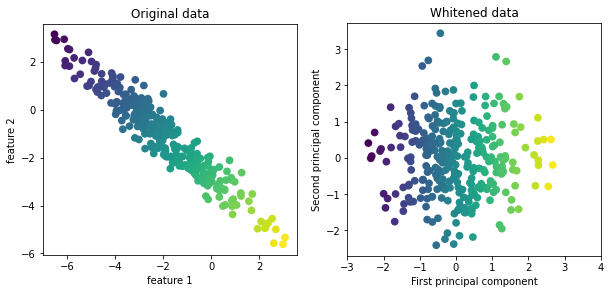

In [18]:
mglearn.plots.plot_pca_whitening()

In [19]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
# print(x_train_pca.shape)
knn.fit(x_train_pca, y_train)
print("KNN score after PCA {:.2f}".format(knn.score(x_test_pca, y_test)))

KNN score after PCA 0.09


The score slightly went up as compared to the original 6% without PCA

In [20]:
print("pca.components_.shape: {}".format(pca.components_.shape))


pca.components_.shape: (100, 11750)


#### Printing individual components of PCA

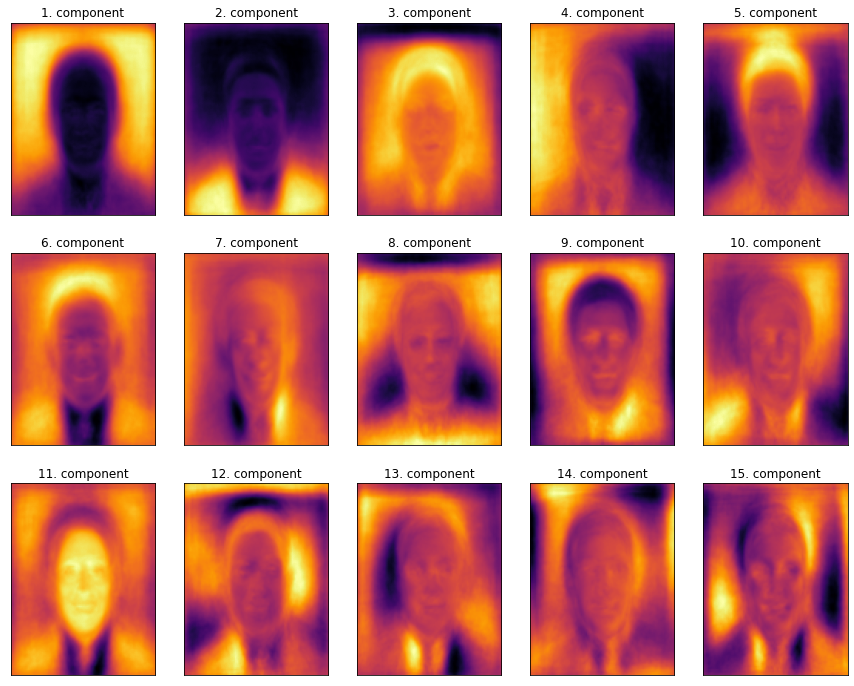

In [21]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='inferno')
    ax.set_title("{}. component".format((i + 1)))


More the number of principal components in a figure, more will be the number of features captured. 

IndexError: list index out of range

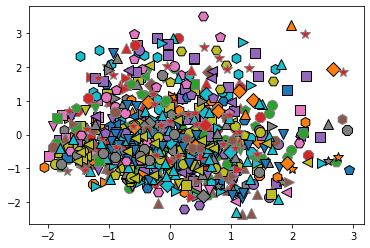

In [22]:
mglearn.discrete_scatter(x_train_pca[:, 0], x_train_pca[:, 1], y_train)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")